# Model - with iter callback

This example shows how to use `lmfit_global.py` with iter callback. 

This example is similar to `model_with_iter_callback.py` of [lmfit examples](https://lmfit.github.io/lmfit-py/examples/index.html) or [github link](https://github.com/lmfit/lmfit-py/tree/master/examples)


In [1]:
try:
    from lmfit_global import LmfitGlobal
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('../lmfit_global')
    from lmfit_global import LmfitGlobal
    
import matplotlib.pyplot as plt

create raw data...

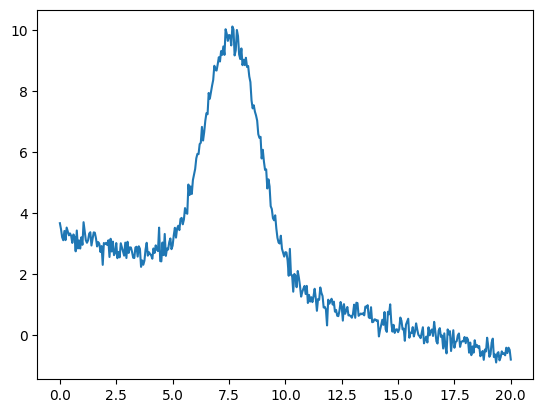

In [2]:
import os
import numpy as np
log2 = np.log(2)
s2pi = np.sqrt(2*np.pi)
s2 = np.sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Parameters
    ----------
    value : scalar
        Value to be ensured not to be zero.

    Returns
    -------
    scalar
        Value ensured not to be zero.

    """
    return float(np.copysign(max(tiny, abs(value)), value))

def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Gaussian function.

    gaussian(x, amplitude, center, sigma) =
        (amplitude/(s2pi*sigma)) * exp(-(1.0*x-center)**2 / (2*sigma**2))

    """
    return ((amplitude/(max(tiny, s2pi*sigma)))
            * np.exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))

def linear(x, slope=1.0, intercept=0.0):
    """Return a linear function.

    linear(x, slope, intercept) = slope * x + intercept

    """
    return slope * x + intercept



x = np.linspace(0., 20, 401)
y = gaussian(x, amplitude=24.56, center=7.6543, sigma=1.23)

np.random.seed(2021)
y = y - .20*x + 3.333 + np.random.normal(scale=0.23, size=x.size)

xy_dat = np.column_stack([x, y])

plt.plot(x, y, '-')


built `data` and `function` **`item`** `dict` for `LmfitGlobal` ...

In [3]:
# data dict
data_dict = {
    'xy': xy_dat,         # data_xy, i.e numpy.column_stack([x, y_0, y_1, ..., y_n])
    'xrange': None    # x range in (min, max) of the data range to fit, default is None
    }


func_lst = [
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':3.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':5, 'min':0, 'max':20},
            'sigma': {'value':1, },
            # 'offset': {},
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
    {
        'func_name': linear,
        'init_params' : {
            'slope': {'value':0.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'intercept': {'value':0, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

# function dict
function_dict = {
    'theory': func_lst,
    'theory_connectors': ['+'],
}


# """
# # --- The `theory_connectors` (list of str): 
#     A list of binary operators (e.g., '+', '-', '*', '/') that define how to combine 
#     the theory functions listed in 'theory'. Each operator connects one function to the next 
#     in left-to-right order. 
    
#     For example: 
#     - ['+', '+'] means: theory[0] + theory[1] + theory[2].

#     - ['+', '*'] means: theory[0] + theory[1] * theory[2].

#     The number of connectors must be exactly one less than the number of theory functions.
#     The ONLY (so-far) supported operators are: '+', '-', '*', '/'.
# """


# items 
items = {
    'data': data_dict,              # 1. data (see above)
    'functions': function_dict,     # 2. thoery (see above)
}

call `LmfitGlobal` ...

In [4]:
LFG = LmfitGlobal(items)
# --- The box below show how the model y(x) (CompositeModel) is define using `theory_connectors` define above ---
# --- it is upto the USER to define how to define the CompositeModel ---
# --- if you are HAPPY proceed NEXT

INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: ###############################################################################
INFO: # y(x;) = gaussian(x, amplitude, center, sigma) + linear(x, slope, intercept) #
INFO: ###############################################################################


Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
c0_amplitude_0         3     -inf      inf     None     True     None     None
c0_center_0            5        0       20     None     True     None     None
c0_sigma_0             1     -inf      inf     None     True     None     None
c1_intercept_0         0     -inf      inf     None     True     None     None
c1_slope_0             0     -inf      inf     None     True     None     None


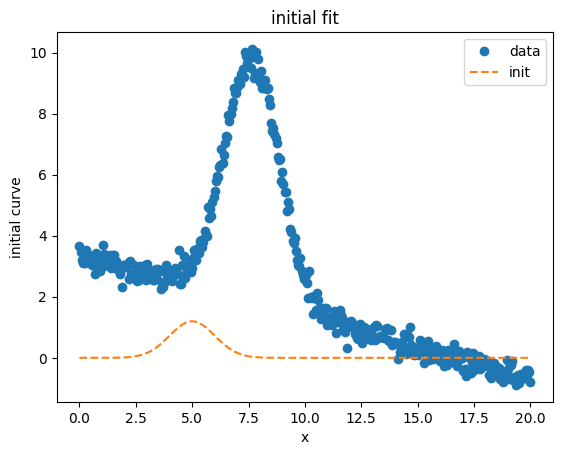

In [5]:
LFG.initial_params.pretty_print()  # pretty print initial parameters

axes0 = LFG.plot_init()  # plot init parameters

fit with iter callback...

In [6]:
def per_iteration(pars, iteration, resid, *args, **kws):
    print(" ITER ", iteration, [f"{p.name} = {p.value:.5f}" for p in pars.values()])

LFG.fit(verbose=False, iter_cb=per_iteration)  # verbose, if True will show fit parameters

print(f'Nfev = {LFG.result.nfev}')

INFO: Fitting DONE...


 ITER  -1 ['c0_amplitude_0 = 3.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  0 ['c0_amplitude_0 = 3.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  1 ['c0_amplitude_0 = 3.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  2 ['c0_amplitude_0 = 3.00003', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  3 ['c0_amplitude_0 = 3.00000', 'c0_center_0 = 5.00005', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  4 ['c0_amplitude_0 = 3.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00001', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  5 ['c0_amplitude_0 = 3.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00001', 'c1_intercept_0 = 0.00000']
 ITER  6 ['c0_amplitude_0 

In [7]:
LFG.report()

[[Model]]
    (Model(gaussian, prefix='c0_') + Model(linear, prefix='c1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 401
    # variables        = 5
    chi-square         = 20.0043556
    reduced chi-square = 0.05051605
    Akaike info crit   = -1192.20257
    Bayesian info crit = -1172.23276
    R-squared          = 0.99377421
[[Variables]]
    c0_amplitude_0:  24.5237053 +/- 0.16281787 (0.66%) (init = 3)
    c0_center_0:     7.63752786 +/- 0.00746964 (0.10%) (init = 5)
    c0_sigma_0:      1.22414559 +/- 0.00811004 (0.66%) (init = 1)
    c1_slope_0:     -0.20264093 +/- 0.00204346 (1.01%) (init = 0)
    c1_intercept_0:  3.36986054 +/- 0.02653939 (0.79%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1_slope_0, c1_intercept_0)     = -0.8574
    C(c0_amplitude_0, c0_sigma_0)     = +0.6681
    C(c0_amplitude_0, c1_intercept_0) = -0.5260
    C(c0_sigma_0, c1_intercept_0)     = -0.3514
    C(c0_amplit

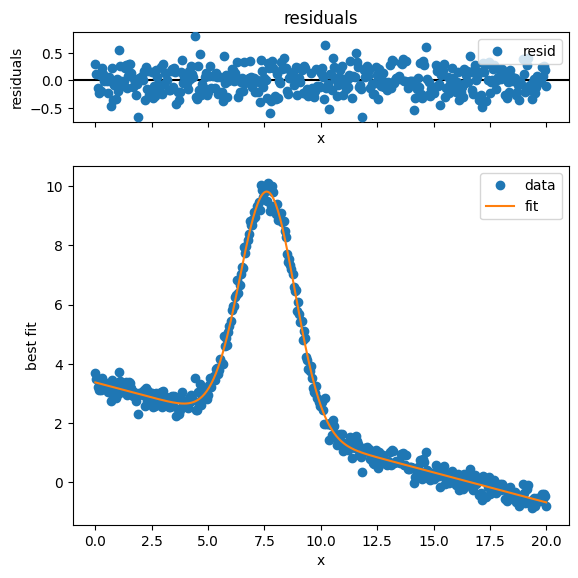

In [8]:
axes1 = LFG.plot(show_init=False)   # plot fit data & residuals and show initial plot (if True)

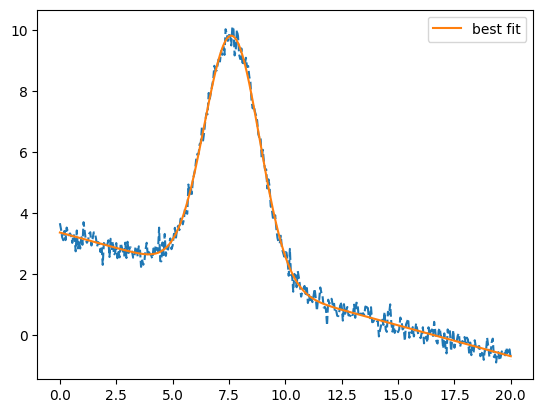

In [9]:
plt.plot(x, y, '--')

plt.plot(x, LFG.best_fit, '-', label='best fit')
plt.legend()
plt.show()